## La classification avec les arbres de décison : DecisionTreeClassifier de scikit-learn

Doc : https://scikit-learn.org/stable/modules/tree.html & https://learn.co/lessons/dsc-decision-trees-with-sklearn-codealong

Dans scikit-learn, la classe **sklearn.tree.DecisionTreeClassifier** permet de réaliser une classification multi-classe à l’aide d’un arbre de décision.

"scikit-learn (sklearn) uses an optimised version of the **CART algorithm**; however, scikit-learn implementation **does not support categorical variables** for now."

"CART constructs **binary trees** using the feature and threshold that yield the largest information gain at each node."

### Import necessary modules : scikit-learn package

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

### Load & explore the dataset : playing tennis

In [43]:
df = pd.read_csv('tennis.csv')

df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [6]:
df.shape

(14, 5)

In [20]:
df.describe()

,outlook,temp,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,False,yes
freq,5,6,7,8,9


In [84]:
df['temp'].value_counts()

mild    6
cool    4
hot     4
Name: temp, dtype: int64

In [85]:
np.unique(df['temp'])

array(['cool', 'hot', 'mild'], dtype=object)

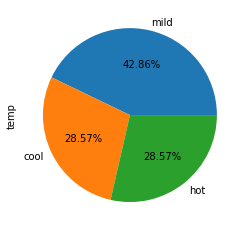

In [102]:
df['temp'].value_counts().plot(kind='pie', autopct='%.2f%%')
# plt.pie(df['temp'].value_counts(), labels=np.unique(df['temp']), autopct='%.2f')
plt.show()

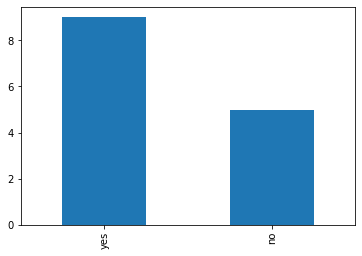

In [93]:
df['play'].value_counts().plot(kind='bar')
plt.show()

### Split the DataFrame into features (X) and target/class (y) 

In [7]:
X = df[['outlook', 'temp', 'humidity', 'windy']]
y = df[['play']]

### Create training and test sets : 70% of it is in the training set, and 30% of it is in the testing set.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [9]:
X_train.shape

(9, 4)

In [10]:
X_test.shape

(5, 4)

### Encode categorical data as numbers : OneHotEncoding

"scikit-learn (sklearn) uses an optimised version of the CART algorithm; however, scikit-learn implementation **does not support categorical variables** for now."

Besoin de transformation des données catégorielles en valeurs numériques => Encoding.

OneHotEncoding - Un encodage à chaud crée de nouvelles colonnes (binaires), indiquant la présence de chaque valeur possible à partir des données d'origine.

In [11]:
ohe = OneHotEncoder()

ohe.fit(X_train)

OneHotEncoder()

In [12]:
X_train_ohe = ohe.transform(X_train).toarray()

X_train_ohe

array([[0., 0., 1., 1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1., 0., 1.]])

#### Showing Encoding results

In [13]:
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))

ohe_df.head()

,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,windy_False,windy_True
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


### Train the decision tree : create the classifier & fit it on the encoded training data

Doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [14]:
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train_ohe, y_train)

DecisionTreeClassifier(criterion='entropy')

### Plot the decision tree

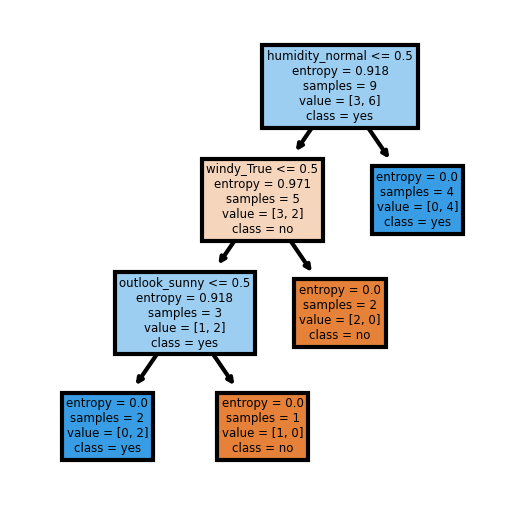

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize =(2,2), dpi=300)

tree.plot_tree(clf,
               feature_names = ohe_df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

### Evaluate the predictive performance : Accuracy

In [16]:
X_test_ohe = ohe.transform(X_test)

y_preds = clf.predict(X_test_ohe)

In [17]:
print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.6


### Plot confusion matrix : True Negatives, False Positives, False Negatives, and True Positives

In [18]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_preds)

print(cf_matrix)

[[1 1]
 [1 2]]


In [21]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()

tn, fp, fn, tp

(1, 1, 1, 2)

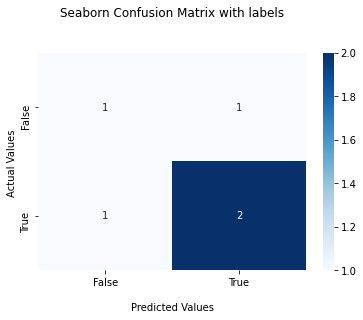

In [22]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix
plt.show()

In [42]:
from sklearn.metrics import precision_score, recall_score

# precision = tp / (tp + fp)
print(recall_score(y_test, y_preds, pos_label='yes', average='binary'))

# recall = tp / (tp + fn)
print(recall_score(y_test, y_preds, pos_label='yes', average='binary'))

0.6666666666666666
0.6666666666666666


### Tree Pruning & Depth : Elagage et profondeur de l'arbre

Le paramètre **max_depth** est un seuil sur la profondeur maximale de l’arbre. 

Le paramètre **min_samples_leaf** donne le nombre minimal d’examples dans un nœud feuille ; Plus d’éléments dans les feuilles, donc moins de nœuds et l’arbre est moins profond.

Ces deux paramètres permettent de mettre des contraintes sur la construction de l’arbre et donc de contrôler indirectement le phénomène de sur-apprentissage.

Sur-apprentissage : parfois les arbres générés sont trop complexes et généralisent mal. Choisir des bonnes valeurs pour les paramètres profondeur maximale (max_depth) et nombre minimal d’exemples par feuille (min_samples_leaf) permet d’éviter ce problème.

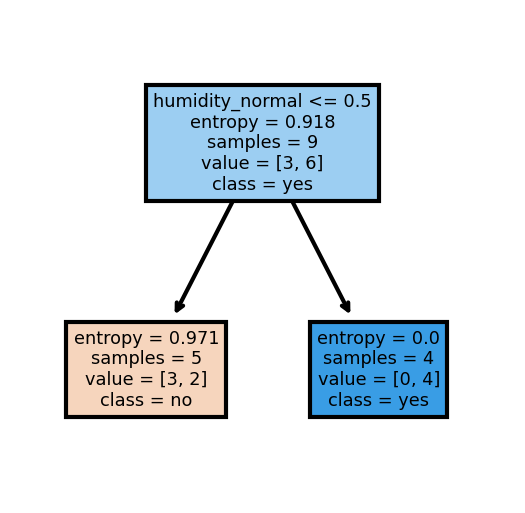

In [103]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)

clf.fit(X_train_ohe, y_train)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize =(2,2), dpi=300)

tree.plot_tree(clf,
               feature_names = ohe_df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)

plt.show()

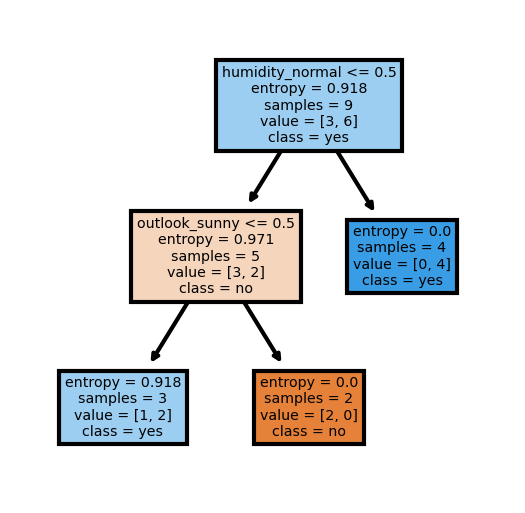

In [106]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

clf.fit(X_train_ohe, y_train)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize =(2,2), dpi=300)

tree.plot_tree(clf,
               feature_names = ohe_df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)

plt.show()